In [1]:
import numpy as np
import pandas as pd
import math

from scipy.signal import spectrogram


from glob import glob
# import os

import matplotlib.pyplot as pl
from pylab import rcParams
%pylab inline

from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller 

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Выберем регион около Empire State Building: 1231 - 3
test_region = 1231-3

In [3]:
# %%time
# df = pd.DataFrame()
# files = glob('aggr_yellow_tripdata_????-??.bin')
# for fname in files:
#     df_tmp = pd.read_pickle(fname)
#     df = df.append(df_tmp[df_tmp['region'] == test_region])
#     print(fname)
    
# print('finish') 

In [4]:
# df.to_pickle('aggr_yellow_tripdata_w3.bin')
df = pd.read_pickle('aggr_yellow_tripdata_w3.bin')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21167 entries, 483727 to 1858727
Data columns (total 3 columns):
datetime    21167 non-null datetime64[ns, UTC]
region      21167 non-null int64
count       21167 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 661.5 KB


In [6]:
df.head()

,datetime,region,count
483727,2014-01-01 00:00:00+00:00,1228,863.0
906227,2014-01-01 01:00:00+00:00,1228,866.0
486227,2014-01-01 02:00:00+00:00,1228,888.0
908727,2014-01-01 03:00:00+00:00,1228,815.0
911227,2014-01-01 04:00:00+00:00,1228,718.0


In [8]:
dmin, dmax = df.datetime.min(), df.datetime.max()
print('Рассматриваемый интервал: {:%d.%m.%Y %H:%M} - {:%d.%m.%Y %H:%M}'.format(dmin, dmax))
print('расчетное количество часов в интервале: {:n}'.format( (dmax - dmin).total_seconds() / 3600 ))
print('Количество записей в DataFrame        : {:n}'.format(len(df)))

Рассматриваемый интервал: 01.01.2014 00:00 - 31.05.2016 23:00
расчетное количество часов в интервале: 21167
Количество записей в DataFrame        : 21167


In [9]:
df_plot = df.set_index('datetime')

In [10]:
# df_plot.resample('M').mean().head

In [11]:
# Индекс имеет тип DatetimeIndex, а у класса DatetimeIndex есть переменная-член date
# Вырезаем данные за год.
s = df_plot.loc[(df_plot.index.date >= datetime.date(2015, 5, 1)) & 
                (df_plot.index.date < datetime.date(2016, 5, 1))]

In [12]:
s.head()

,region,count
datetime,,
2015-05-01 00:00:00+00:00,1228,677.0
2015-05-01 01:00:00+00:00,1228,452.0
2015-05-01 02:00:00+00:00,1228,338.0
2015-05-01 03:00:00+00:00,1228,224.0
2015-05-01 04:00:00+00:00,1228,217.0


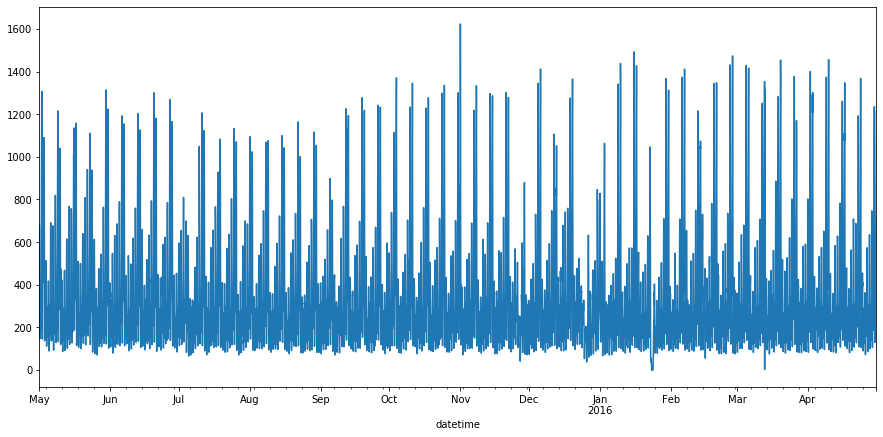

In [13]:
plt.figure(figsize(15,7))
# s['count'].plot()
stmp = s.resample('D').mean()
s['count'].plot();

Курс 5 - Прогнозирование временных рядов  
1-1.Prognozirovanie-vremennyh-ryadov.pdf


dminik5_w1_01

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/

https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

https://habr.com/ru/post/207160/

https://habr.com/ru/post/334220/

Основная сложность работы с такими рядами, как в нашем проекте, заключается в том, как учесть сложную структуру сезонности — суточной, недельной и годовой. В рамках моделей ARIMA можно учесть только одну из них. Обычно в таких случаях **сезонность с самым маленьким периодом явно моделируют с помощью аримы, а все остальные учитывают за счёт регрессионной компоненты.**

In [14]:
s_diff = s['count'].diff()

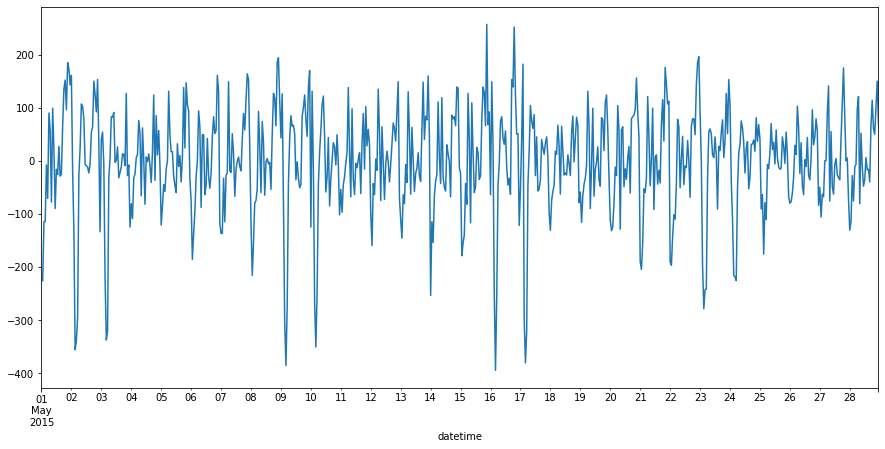

In [15]:
# s_diff.resample('D').mean().head(100).plot();
s_diff.head(28*24).plot();

In [16]:
# stmp = s_diff.head(28*24)
stmp = s.head(28*24)['count']

In [17]:
stmp.head()

datetime
2015-05-01 00:00:00+00:00    677.0
2015-05-01 01:00:00+00:00    452.0
2015-05-01 02:00:00+00:00    338.0
2015-05-01 03:00:00+00:00    224.0
2015-05-01 04:00:00+00:00    217.0
Name: count, dtype: float64

In [18]:
stmp.index.date

array([datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 2), datetime.date(2015, 5, 2),
       datetime.date(2015, 5, 2), datetime.date(2015, 5, 2),
       datetime.date(2015, 5, 2), datetime.date(2015, 5, 2),
       datetime.date(2015, 5, 2), datetime.date(2015, 5, 2),
       datetime.date(201

In [18]:
len(stmp)

672

In [19]:
# X_week = []
# ibeg = 0
# for k in range(2, 6):
#     X_week.append([ math.sin(i* 2.*math.pi*k/168) for i in range(ibeg, len(stmp) + ibeg)])
#     X_week.append([ math.cos(i* 2.*math.pi*k/168) for i in range(ibeg, len(stmp) + ibeg)])
s_mean.head()  

NameError: name 's_mean' is not defined

0.8004055823057703


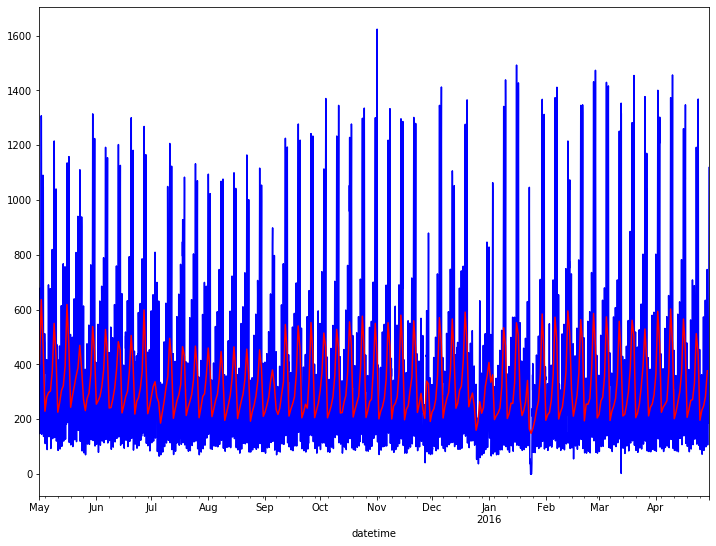

In [44]:
# Попробуем так: вычислим коэффициенты для значенией, усредненных за день, а потом по ним 
# рассчитаем и отобразим все значения.

rcParams['figure.figsize'] = 12, 9


stmp = s.head(365*24).copy()
s_mean = stmp.resample('D').mean()

t_period = 7

# можно для начала взять K равным 2-5
Kmax = 5
# for Kmax in range(2, 20):
X_week = []
for i in range(0, len(s_mean)):
    X_week.append([ math.sin(i* 2.*math.pi*k/t_period) for k in range(1, Kmax+1)] + 
                  [ math.cos(i* 2.*math.pi*k/t_period) for k in range(1, Kmax+1)])

lr = LinearRegression()
lr.fit( X_week , s_mean['count'].values)
score  = lr.score(X_week , s_mean['count'].values)
print(score)



# t_period = 7*24
# X_week_pred = []
# for i in range(0, len(stmp)):
#     X_week_pred.append([ math.sin(i* 2.*math.pi*k/t_period) for k in range(1, Kmax+1)] + 
#                        [ math.cos(i* 2.*math.pi*k/t_period) for k in range(1, Kmax+1)])

# stmp['tmp']  = lr.predict(X_week_pred)
s_mean['tmp'] = lr.predict(X_week)


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1,1,1)

stmp['count'].plot(ax=ax, color='b')
s_mean['count'].plot(ax=ax, color='r')

# stmp['tmp'] = y_test
# stmp['delta'] = stmp['count'] - stmp['tmp']
# stmp[['count',  'tmp', 'delta']].plot()
#     stmp['delta'].plot()
#     pl.plot(y_test)
#     pl.plot(stmp.values)
#     pl.set
# print(l_score)
# rcParams['figure.figsize'] = 12, 9
# decomp=seasonal_decompose(stmp['delta'] )
# decomp.plot()
pl.show();

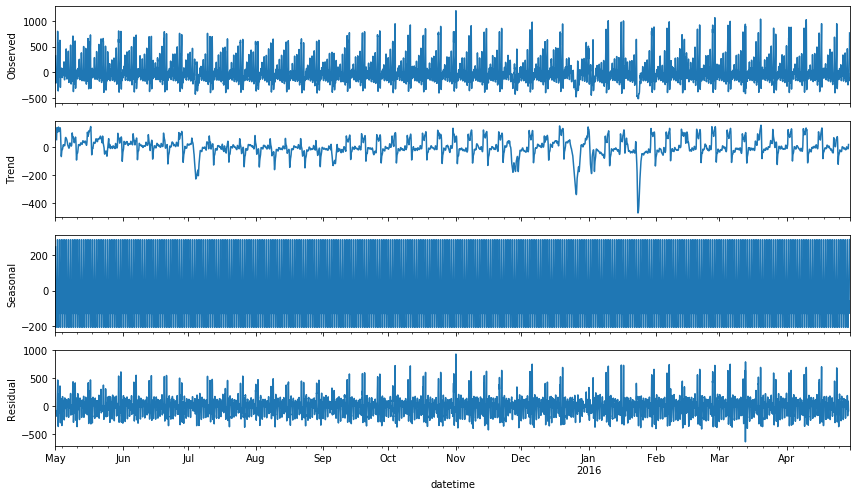

In [45]:
from datetime import datetime
rcParams['figure.figsize'] = 12, 7
stmp['ddd'] = stmp.index
stmp['mean'] = stmp.apply(lambda row: s_mean.loc[datetime(year=row.ddd.year, month=row.ddd.month,
                    day=row.ddd.day, hour=0, second=0)]['tmp'] , axis=1)
stmp['delta'] = stmp['count'] - stmp['mean']

# stmp[['count',  'delta']].plot()

# stmp['delta'] = np.log(stmp['delta'])
# stmp.head()
decomp=seasonal_decompose(stmp['delta'])
decomp.plot();

Пробуем преобразование Фурье

0.16309800161633492


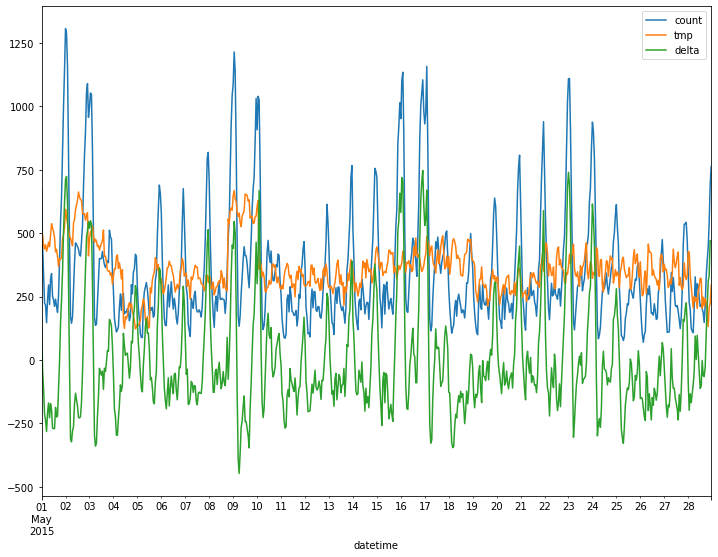

In [156]:
# stmp = s.head(7*52*24).copy()
stmp = s.head(7*4*24).copy()
stmp = stmp.dropna()

sample_freq = np.fft.fftfreq(stmp.shape[0], d=1)
Y = np.fft.fft(stmp['count'].values)

power = np.abs(Y)
N = len(power) // 2
df_fft = pd.DataFrame(power[:N], columns=['freg_val'])
df_fft['freg'] = sample_freq[:N]
df_fft['phase'] = np.angle(Y[:N])
df_fft['days'] = 1. / (24.* df_fft['freg']) 
df_fft.sort_values(by='freg_val', ascending=False, inplace=True)
# df_freg = df_fft[ (df_fft.freg  == 0.) | ( abs(df_fft.days - round(df_fft.days)) < 0.001) ].head(10)
#df_freg = df_fft[   abs(df_fft.days - round(df_fft.days)) < 0.001 ].head(10)
# df_freg = df_fft[ (df_fft.freg  > 0.) & (df_fft.days >= 1.) ].head(100)
df_freg = df_fft[ (df_fft.freg  > 0.)  ].head(50)
# print(df_freg)
X = []
lval = df_freg['freg_val'].values.tolist()
lfregs = df_freg['freg'].values.tolist()
lphase = df_freg['phase'].values.tolist()

for i in range(0, len(stmp)):
    lx = [val * math.sin(phase + i*2.*math.pi / freg )  for val, freg, phase in zip(lval, lfregs, lphase)]     
    X.append(lx)

lr = LinearRegression()
lr.fit( X , stmp['count'].values)
print(lr.score(X , stmp['count'].values))
y_test = lr.predict(X)

    
stmp['tmp'] = y_test
# stmp['tmp'].plot()
stmp['delta'] = stmp['count'] - stmp['tmp']
stmp[['count',  'tmp', 'delta']].plot()

# df_freg


Test Statistic                  -4.116713
p-value                          0.000909
#Lags Used                      48.000000
Number of observations Used    623.000000
dtype: float64


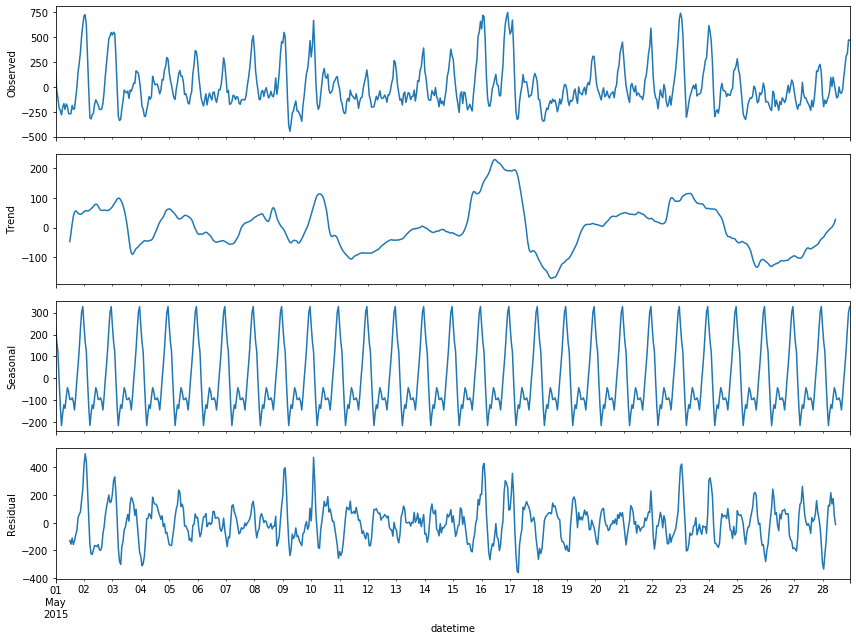

In [157]:
dftest =  adfuller(stmp['delta'], autolag=None, maxlag=24*2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of observations Used'])
print (dfoutput)
rcParams['figure.figsize'] = 12, 9
decomp=seasonal_decompose(stmp['delta'] )
decomp.plot()
pl.show();

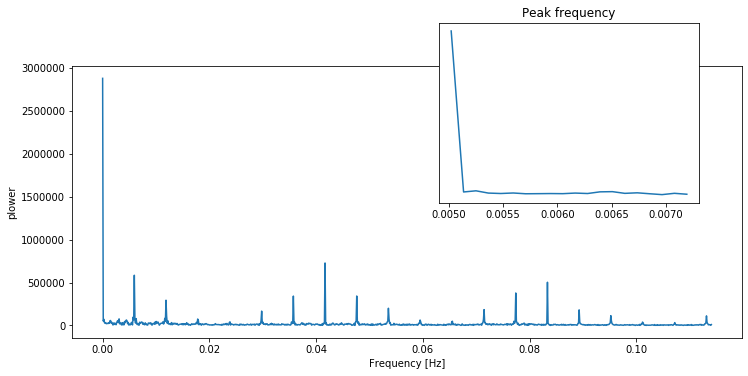

In [45]:
plt.figure(figsize=(12, 5))
# plt.yscale('log')
N = 1000
plt.plot(sample_freq[:N], power[:N])
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0.005)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
# np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.5, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:20], power[:20])
plt.setp(axes, yticks=[]);

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

Test Statistic                  -4.632656
p-value                          0.000112
#Lags Used                      48.000000
Number of observations Used    623.000000
dtype: float64
         freg_val     phase
28   61852.264164  0.472362
56   44103.031231  0.645227
168   4013.782815  2.700732
84    3036.437482  0.092976
196   2031.815166  0.537071


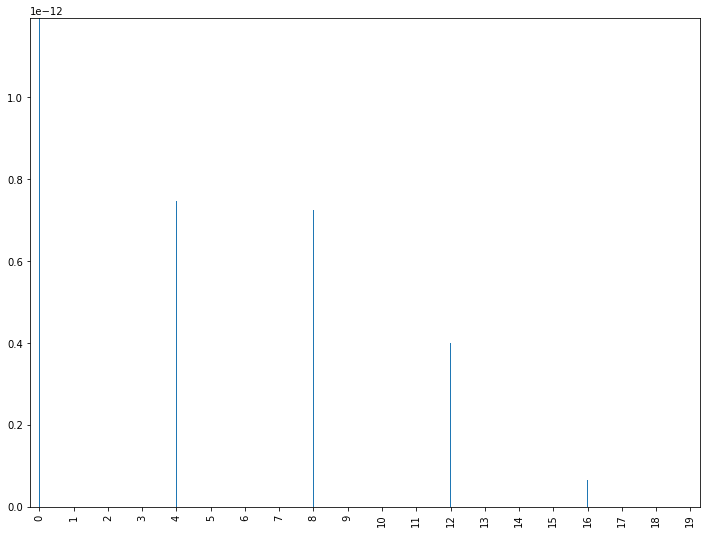

In [48]:
# Задача - построить распределение, выбрати nRet наибольших частот и для них построить график
def fft_freg_xxx( df, nRet=10, fregMin = 0 ):
    
    sample_freq = np.fft.fftfreq(df.shape[0], d=24)
    N = df.shape[0] // 2
    Y = np.fft.fft(df['count'].values) # fft computing and normalization
    df_fft = pd.DataFrame(np.abs(Y[:N]), columns=['freg_val'])
    df_fft['phase'] = np.angle(Y[:N])
                                                  #     return df_fft[df_fft.freg_val > 100000]
    df_fft.sort_values(by='freg_val', ascending=False, inplace=True)
#     df_fft = df_fft[df_fft.index > fregMin].head(nRet)
    
    df_fft['days'] = df_fft.index.values / 60.
    
    df_fft = df_fft[ (df_fft.days == 0.) | ( df_fft.days > 1.) ].head(nRet)
    
    Y0 = [ V if i in df_fft.index.values else 0 for i,V in enumerate(Y) ]
    X0 = np.fft.ifft(Y0)
    df['X0'] = np.abs( X0 )
    stmp['delta'] = stmp['count'] - stmp['X0']
    rcParams['figure.figsize'] = 12, 9
#     df[['X0', 'count', 'delta']].plot(figsize=(14.5, 9))
#     plt.plot(X0)

    dftest =  adfuller(stmp['delta'], autolag=None, maxlag=24*2)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of observations Used'])
    print (dfoutput)
    rcParams['figure.figsize'] = 12, 9
    decomp=seasonal_decompose(stmp['delta'] )
#     print(decomp.seasonal)
    Yses = np.fft.fft(decomp.seasonal)
    df_fft_ses = pd.DataFrame(np.abs(Yses[:N]), columns=['freg_val'])
    df_fft_ses['phase'] = np.angle(Yses[:N])
    df_fft_ses.sort_values(by='freg_val', ascending=False, inplace=True)
    df_fft_ses['freg_val'].sort_index().head(20).plot.bar(width=0.05)
#     df_fft['freg_val'].sort_index().plot.bar(width=0.05)
    print(df_fft_ses.head())
    
#     decomp.plot()
#     pl.show()
    return df_fft
        
# 
stmp = s.head(4*7*24).copy()
stmp = stmp.dropna()
df_plot = fft_freg_xxx(stmp, 20, 0)
# df_plot


,freg_val,phase
52,584867.342401,-0.689469
104,294185.932696,-1.999067
313,342072.985862,0.559908
365,727712.740206,0.405395
417,343123.065050,-0.449690
469,200377.163671,-1.792446
626,184610.059703,1.403792
678,378336.419505,0.238008
730,503157.581535,0.592588
1043,194086.905286,-0.388732


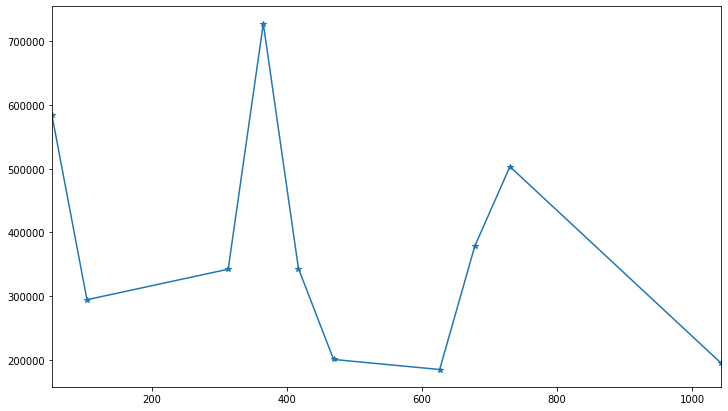

In [57]:
def fft_freg( df, nRet=10, fregMin = 0 ):
    
    N = df.shape[0] // 2
    Y = np.fft.fft(df['count'].values) # fft computing and normalization
    df_fft = pd.DataFrame(np.abs(Y[:N]), columns=['freg_val'])
    df_fft['phase'] = np.angle(Y[:N])
                                                  #     return df_fft[df_fft.freg_val > 100000]
    df_fft.sort_values(by='freg_val', ascending=False, inplace=True)
    return df_fft[df_fft.index > fregMin].head(nRet)
# Y = Y[range(n/2)]
# T = 12*7*24 
#     xf = np.linspace(0.0, T/24., 1.)
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(t,y)
# ax[0].set_xlabel('Time')
# ax[0].set_ylabel('Amplitude')
# plt.plot(abs(Y),'r'); # plotting the spectrum
# ax[1].set_xlabel('Freq (Hz)')
# ax[1].set_ylabel('|Y(freq)|')
# fig, ax = plt.subplots()
# ax.plot(2.0/N * np.abs(Y[:T]))
# plt.show()
df_plot = fft_freg(stmp, 10, 24)
df_plot['freg_val'].sort_index().plot(style='*-')
df_plot.sort_index()

In [ ]:

Y = np.fft.fft(stmp['count'].values) 



а теперь не чистое преобразование Фурье, а его реализацию в scipy.signal.spectrogram

In [25]:
а, t, Sxx = spectrogram(stmp['count'].values)
# plt.pcolormesh(t, Sxx)
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()
t

array([ 128.,  352.,  576.,  800., 1024., 1248., 1472., 1696.])

посмотрим на сигнал восстановленный из разложения Фурье, без линейного предсказания

[0.504331167670467]
Test Statistic                -6.412688e+00
p-value                        1.873847e-08
#Lags Used                     4.800000e+01
Number of observations Used    6.230000e+02
dtype: float64


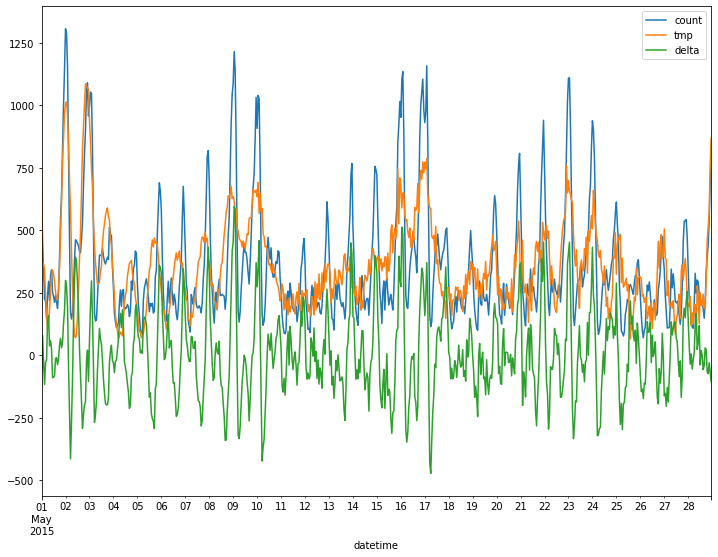

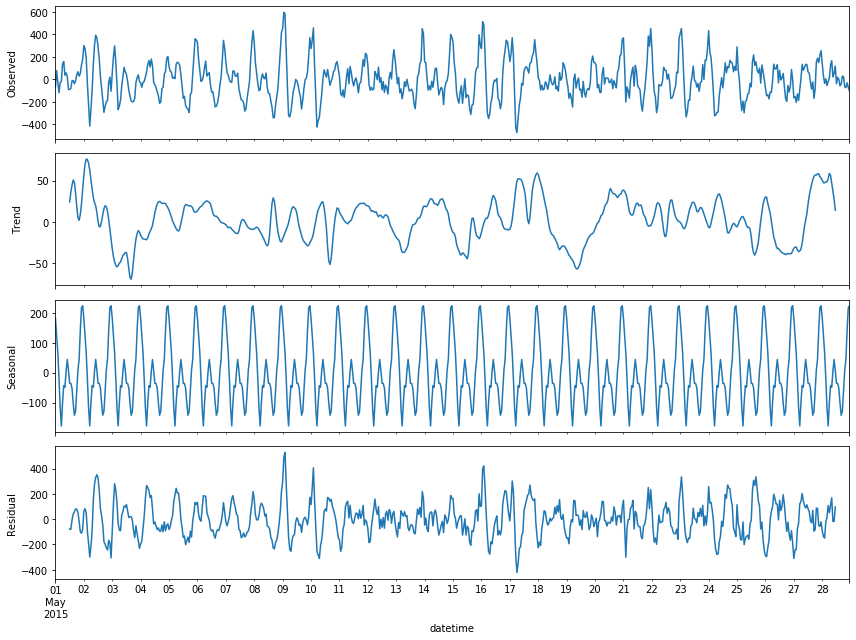

In [83]:
# pl.figure(figsize=(12,8))
rcParams['figure.figsize'] = 12, 9
stmp = s.head(4*7*24).copy()
stmp = stmp.dropna()
df_freg = fft_freg(stmp, 100, 24)

l_score = []
# можно для начала взять K равным 2-5
Kmax = 1

X_week = []
lfregs = df_freg.index.values.tolist()
lphase = df_freg['phase'].values.tolist()

# print('Используемые частоты:', np.array(lfregs)/24.)

for i in range(0, len(stmp)):
    lfreg = []
    for freg, phase in zip(lfregs, lphase):
#         lfreg += [ math.sin(i* 2.*math.pi*k/freg) for k in range(1, Kmax+1)] + [ math.cos(i* 2.*math.pi*k/freg) for k in range(1, Kmax+1)]
        lfreg += [ math.sin(phase + i* 2.*math.pi/freg) ]
         
    X_week.append(lfreg)

lr = LinearRegression()
lr.fit( X_week , stmp['count'].values)
l_score.append(lr.score(X_week , stmp['count'].values))
y_test = lr.predict(X_week)

stmp['tmp'] = y_test
stmp['delta'] = stmp['count'] - stmp['tmp']
stmp[['count',  'tmp', 'delta']].plot()
# stmp['tmp'].plot()
#     stmp['delta'].plot()
#     pl.plot(y_test)
#     pl.plot(stmp.values)
#     pl.set
print(l_score)
dftest =  adfuller(stmp['delta'], autolag=None, maxlag=24*2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of observations Used'])
print (dfoutput)
rcParams['figure.figsize'] = 12, 9
decomp=seasonal_decompose(stmp['delta'] )
decomp.plot()
pl.show();

In [62]:
# pl.figure(figsize=(12,8))
rcParams['figure.figsize'] = 12, 9
stmp = s.head(4*7*24).copy()
stmp = stmp.dropna()
df_freg = fft_freg(stmp, 30, 24)
# stmp['count'] = np.log( stmp['count'].values )

# stmp = s.head(12*28*24).resample('D').mean().copy()
# t_period = 7*24 # = 168 
# t_period2 = 12 # 365
# t_period3 = 84 #4*7*24
# t_period4 = 1848 #4*7*24
l_score = []
# можно для начала взять K равным 2-5
Kmax = 1
# for Kmax in range(2, 20):

X_week = []
lfregs = df_freg.index.values.tolist()
lphase = df_freg['phase'].values.tolist()
# for i in [7*24, 356]:
#     if i not in lfregs:
#         lfregs += [i]
# print('Используемые частоты:', np.array(lfregs)/24.)

for i in range(0, len(stmp)):
    lfreg = []
    for freg, phase in zip(lfregs, lphase):
#         lfreg += [ math.sin(i* 2.*math.pi*k/freg) for k in range(1, Kmax+1)] + [ math.cos(i* 2.*math.pi*k/freg) for k in range(1, Kmax+1)]
        lfreg += [ math.sin(lphase + i* 2.*math.pi*k/freg) for k in range(1, Kmax+1)] 
         
    X_week.append(lfreg)

lr = LinearRegression()
lr.fit( X_week , stmp['count'].values)
l_score.append(lr.score(X_week , stmp['count'].values))
y_test = lr.predict(X_week)

stmp['tmp'] = y_test
stmp['delta'] = stmp['count'] - stmp['tmp']
stmp[['count',  'tmp', 'delta']].plot()
#     stmp['delta'].plot()
#     pl.plot(y_test)
#     pl.plot(stmp.values)
#     pl.set
print(l_score)
dftest =  adfuller(stmp['delta'], autolag=None, maxlag=24*2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of observations Used'])
print (dfoutput)
rcParams['figure.figsize'] = 12, 9
decomp=seasonal_decompose(stmp['delta'] )
decomp.plot()
pl.show();

Используемые частоты: [1.16666667 2.33333333 2.16666667 1.33333333 1.5        3.33333333
 2.5        3.16666667 2.         3.66666667 2.66666667 7.
 3.5        4.5        1.41666667 4.33333333 1.66666667 2.25
 1.58333333 1.08333333 3.41666667 1.70833333 1.45833333 1.375
 4.83333333 3.         2.625      2.04166667 4.66666667 1.625     ]


TypeError: can only concatenate list (not "float") to list

In [23]:
# stmp['count'].rolling(window=24*7).mean().plot();
adfuller(stmp['delta'])

(-8.220863328292603,
 6.435387233747604e-13,
 16,
 655,
 {'1%': -3.4403730727154724,
  '5%': -2.86596268312982,
  '10%': -2.569125249694074},
 7181.033553574586)

Проверка стационарности выполняетс по критерию Дики-Фуллера, с проверкой гипотезы
𝐻0:  ряд нестационарен

Test Statistic                  -3.870373
p-value                          0.002264
#Lags Used                      48.000000
Number of observations Used    623.000000
dtype: float64


[1.3902030415210157e-05,
 0.002264031864085891,
 0.13054346174883197,
 0.26508642728083914,
 0.4857482236165794,
 0.5805288125783084,
 0.1931073115809146,
 0.0786003371999034,
 0.12267061300760818]

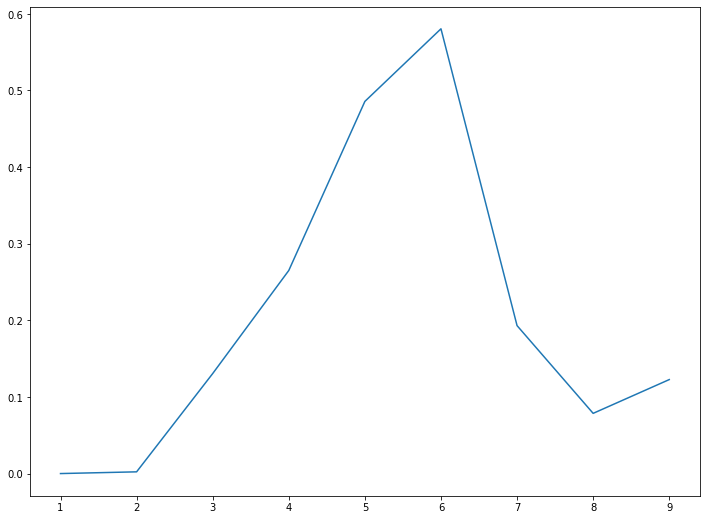

In [45]:
# print("Критерий Дики-Фуллера: p=%f" % adfuller(stmp['delta'])[1])
lout = []
for i in range(1, 10):
    dftest =  adfuller(stmp['delta'], autolag=None, maxlag=24*i)
    lout.append(dftest[1])
    

dftest =  adfuller(stmp['delta'], autolag=None, maxlag=24*2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of observations Used'])
print (dfoutput)
plt.plot(range(1, 10), lout)
lout

Значение p < 0.05 означает, что критерий Дики-Фуллера отвергает гипотезу нестационарности

Из учебного задания:  
Критерий Дики-Фуллера p=0.991850 не позволяет отклонить гипотезу  𝐻0:  ряд нестационарен на уровне 0.05.
Кроме того, о нестационарности ряда говорит четко выраженный тренд и наличие в ряде монотонно по времени изменяющейся дисперсии.

Применяем преобразование, преобразование Бокса-Кокса для стабилизации дисперсии:

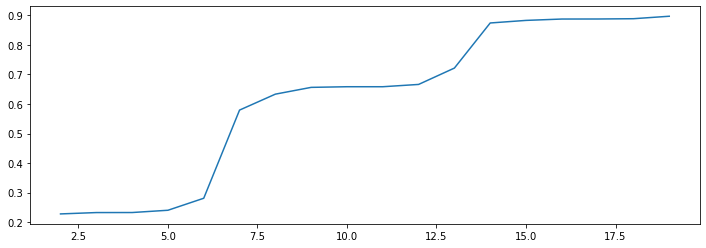

In [72]:
pl.figure(figsize=(12,4))
pl.plot(range(2, 20), l_score);

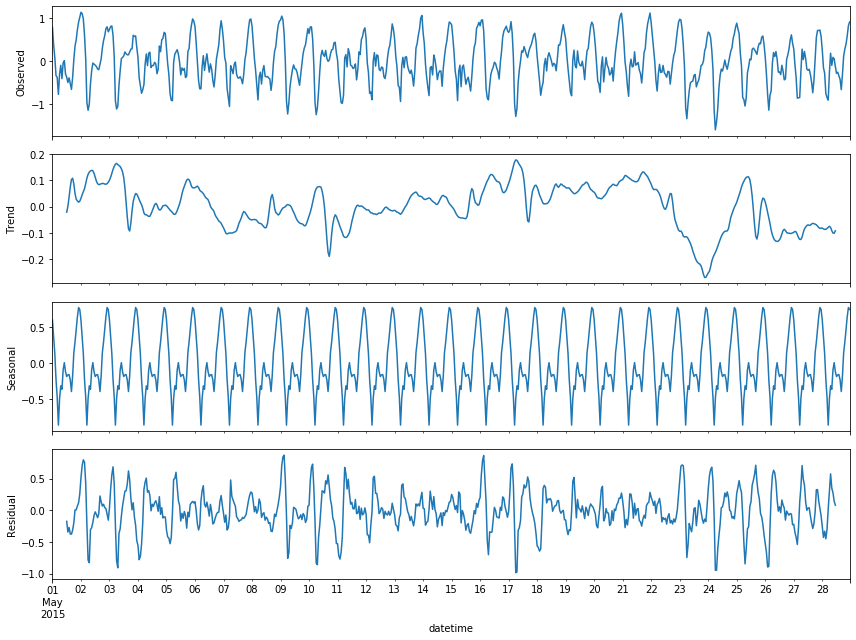

In [84]:
# stmp = s.head(28*24).copy()
# stmp.head()
# pl.figure(figsize=(12,4))
# plt.plot(X_week)

In [ ]:
print(lr.coef_)
rcParams['figure.figsize'] = 12, 4
aX = np.array(X_week)
aOut = np.zeros(aX.shape[0])
for i, a in enumerate(lr.coef_):
#     if abs(a) > 16.:
    aOut += a* aX[:, i]

plt.plot(aOut);

In [85]:
print(min(l_score))
print(max(l_score))

0.5656068854233149
0.5656068854233149


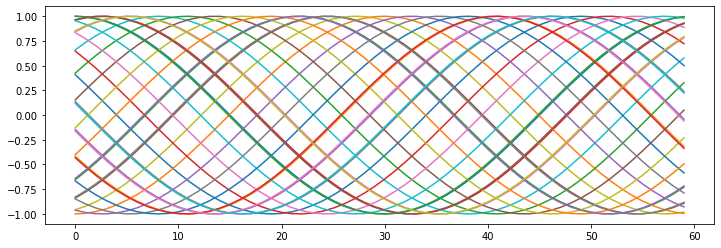

In [24]:
pl.figure(figsize=(12,4))
t_period = 10*6
ibeg = 80
for theta in range(0, t_period, 2):
    tmp = [math.cos(2*math.pi*i/t_period + theta)  for i in range(0, t_period)]
    plt.plot(tmp)
    # tmp1 = [math.sin(4*math.pi*i/t_period) + 1*math.cos(4*math.pi*i/t_period) for i in range(ibeg, t_period+ibeg)]
# 
# plt.plot(tmp)
# plt.plot(tmp1);

In [47]:
lr = LinearRegression(multioutput='uniform_average')
lr.fit( X_week , stmp.values)

TypeError: __init__() got an unexpected keyword argument 'multioutput'

In [38]:
lr.coef_

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [ 16.65621642, -23.33659136,  12.80854311, -23.88313916,
        -75.23661285,   6.24595665,  -1.69877779, -35.07986357]])

In [39]:
lr.intercept_ 

array([1228.        ,  329.05927156])

In [41]:
lr.score(X_week , stmp.values)

/home/adm-net/anaconda2/envs/py37/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.0728638518079836